# VISUALIZING STATISTICAL DATA IN R

***

# Contents
- [Data Normality Visualization](#Data-Normality-Visualization)
- [Data Correlation Visualizatoin](#Data-Correlation-Visualization)
- [Residual Analysis](#Residual-Analysis)
- [Plotting](#Plotting)
  * [2D Point Distributions](#2D-Point-Distributions)

***

- **Configurations**

In [ ]:
# import library
library(rgdal)
library(maps)
library(mapproj)

# remove warning messages
options(warn=-1)

# set up working directory
file_dir = getwd()
data_dir = paste(file_dir, '/data/', sep = "")

setwd(file_dir)

## Data Normality Visualization
[`Back to Contents`](#Contents)

- **Read Data**

In [4]:
setwd(data_dir) # changed to data directory 

# read the columbus shapefile
columbus.shp = readOGR('.', 'columbus') 

# converted to data frame 
columbus.df = as.data.frame(columbus.shp)

setwd(file_dir) # changed back to root directory 

OGR data source with driver: ESRI Shapefile 
Source: "D:\Repos\SP19_GEOG8102_AdvancedSpatailAnalysis\hw1\data", layer: "columbus"
with 49 features
It has 20 fields
Integer64 fields read as strings:  COLUMBUS_ COLUMBUS_I POLYID 


- **Normality Analysis**

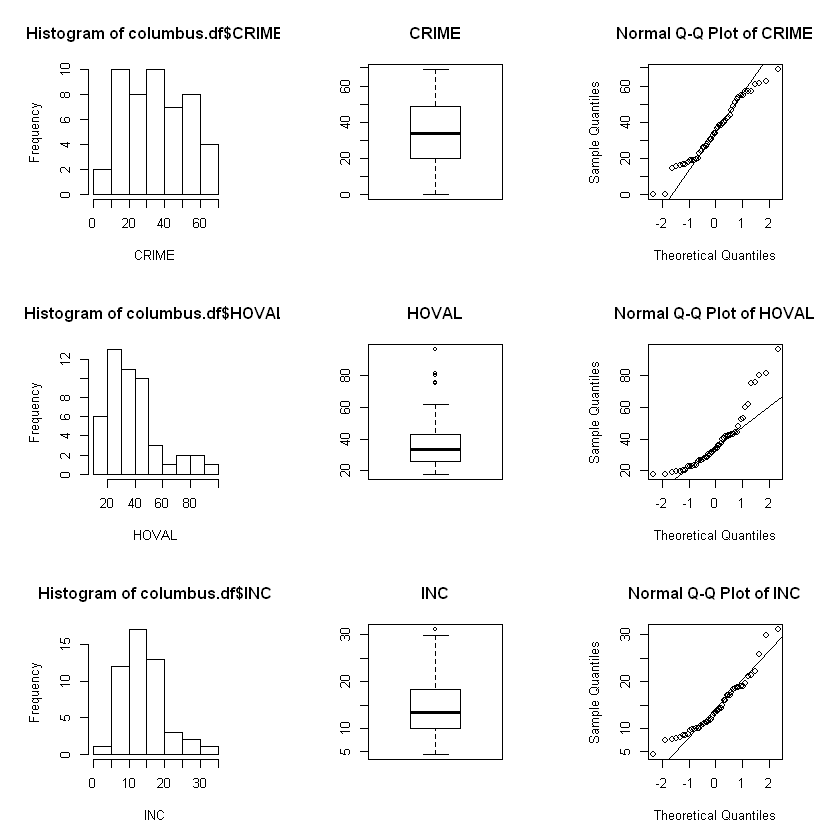

In [5]:
# plot histogram, boxplot and QQ plot for Crime, Hoval, and Inc
par(mfrow=c(3,3), pty='s')
hist(columbus.df$CRIME, xlab='CRIME')
boxplot(columbus.df$CRIME, main='CRIME')
qqnorm(columbus.df$CRIME, main='Normal Q-Q Plot of CRIME')
qqline(columbus.df$CRIME)
# title("Crimes", line=-1, outer=TRUE)

hist(columbus.df$HOVAL, xlab='HOVAL')
boxplot(columbus.df$HOVAL, main='HOVAL')
qqnorm(columbus.df$HOVAL, main='Normal Q-Q Plot of HOVAL')
qqline(columbus.df$HOVAL)
# title("Housing Value (HOVAL)", line=-18, outer=TRUE)

hist(columbus.df$INC, xlab='INC')
boxplot(columbus.df$INC, main='INC')
qqnorm(columbus.df$INC, main='Normal Q-Q Plot of INC')
qqline(columbus.df$INC)
# title("Household Income (INC)", line=-36, outer=TRUE)

par(mfrow=c(1,1))

#title(sub="Figure 1. Normality Analysis for CRIME, HOVAL, and INC", line=-1, outer=TRUE)

**CRIME variable:** the roughly normal shape of the histogram, the symmetry of the boxplot with no outliers, and the moderate linearity of the points suggest a roughly normal distribution.   

**HOVAL variable:** the positively skewed shape of the histogram, slight asymmetry of the boxplot with several outliers in extremely high values, and outliers with extreme values in relation to the qqplot line suggest a distribution that is positively skewed. 

**INC variable:** the positively skewed shape of the histogram, slight asymmetry of the boxplot, and moderate linearity of the points suggest a distribution that is slightly positively skewed. 

## Data Correlation Visualization
[`Back to Contents`](#Contents)

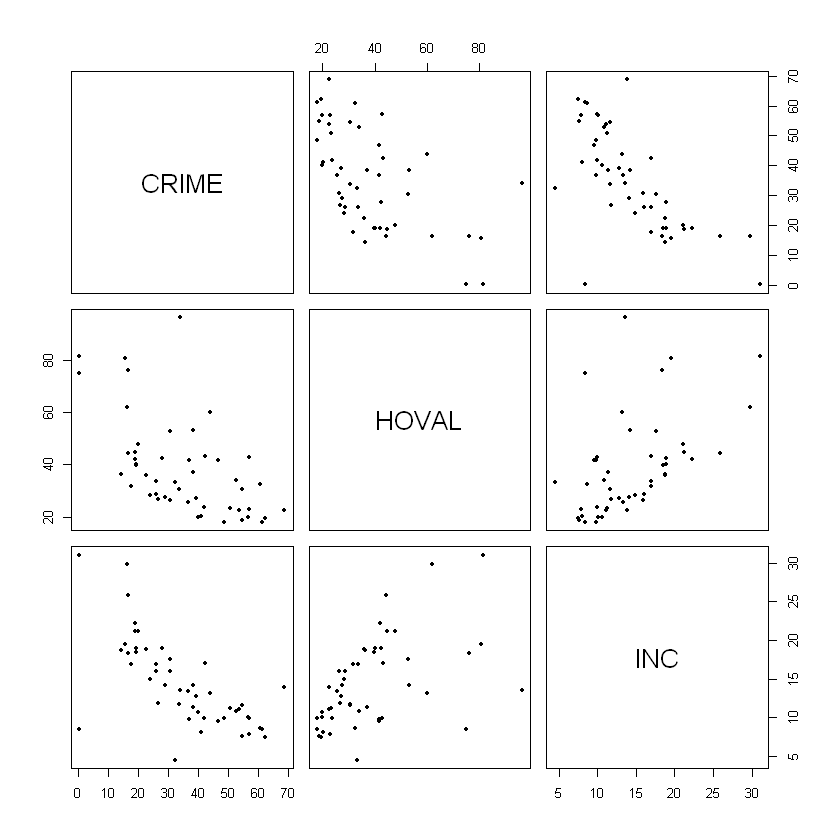

In [6]:
plot(columbus.df[,c('CRIME', 'HOVAL', 'INC')], pch=20)

**CRIME** seems to have a negative relationship with HOVAL and INC; as housing value and household income increase, the crime rate decreases. The strength of the linear relationship appears quite strong, with some points dispersed. 

**HOVAL** and **INC** are positively associated; as HOVAL increases, INC increases and vice versa. The strength of the linear relationship seems fairly strong, with more dispersed points. 

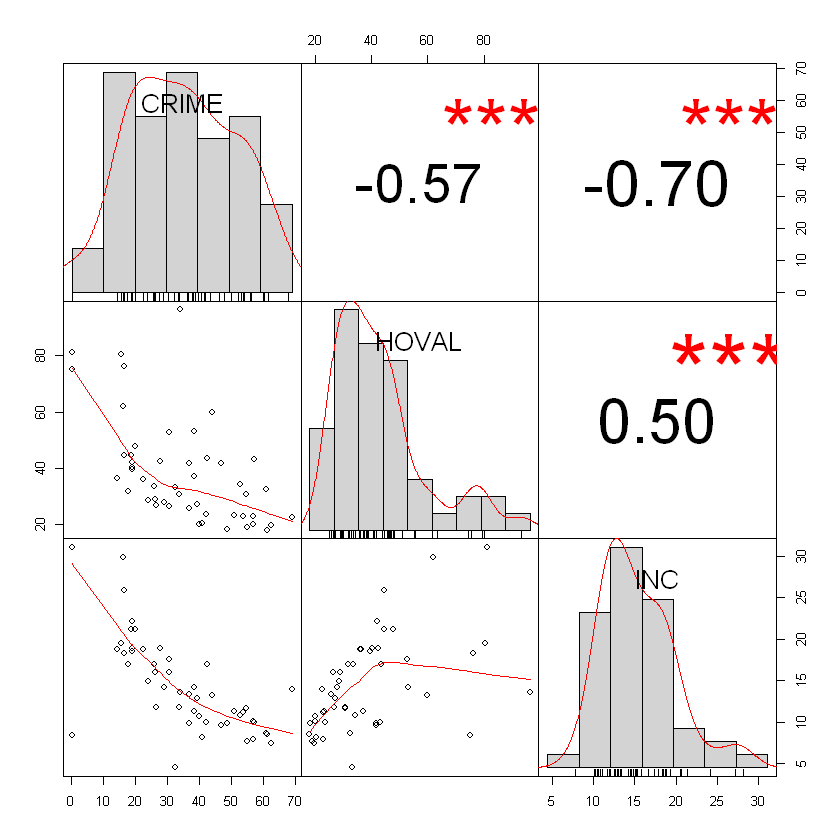

In [8]:
library(PerformanceAnalytics)
chart.Correlation(columbus.df[,c('CRIME', 'HOVAL', 'INC')])

&nbsp; &nbsp; &nbsp; From the above plots, there exists a significantly strong non-linear relationship between CRIME and INC. Their correlation is -0.7 with the p-value of 0.001, and the fitted curve is shown as red in the bivariate scatter plot. Because of this strong relationship, CRIME and HOVAL are not suitable for being considered as independent variables together in order to fit non-linear regression models.

## Residual Analysis
[`Back to Contents`](#Contents)

In [9]:
crime.lm = lm(columbus.df$CRIME ~ columbus.df$HOVAL + columbus.df$INC)
summary(crime.lm)


Call:
lm(formula = columbus.df$CRIME ~ columbus.df$HOVAL + columbus.df$INC)

Residuals:
    Min      1Q  Median      3Q     Max 
-34.418  -6.388  -1.580   9.052  28.649 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)        68.6190     4.7355  14.490  < 2e-16 ***
columbus.df$HOVAL  -0.2739     0.1032  -2.654   0.0109 *  
columbus.df$INC    -1.5973     0.3341  -4.780 1.83e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 11.43 on 46 degrees of freedom
Multiple R-squared:  0.5524,	Adjusted R-squared:  0.5329 
F-statistic: 28.39 on 2 and 46 DF,  p-value: 9.341e-09


- **Residual Visualizatoin**

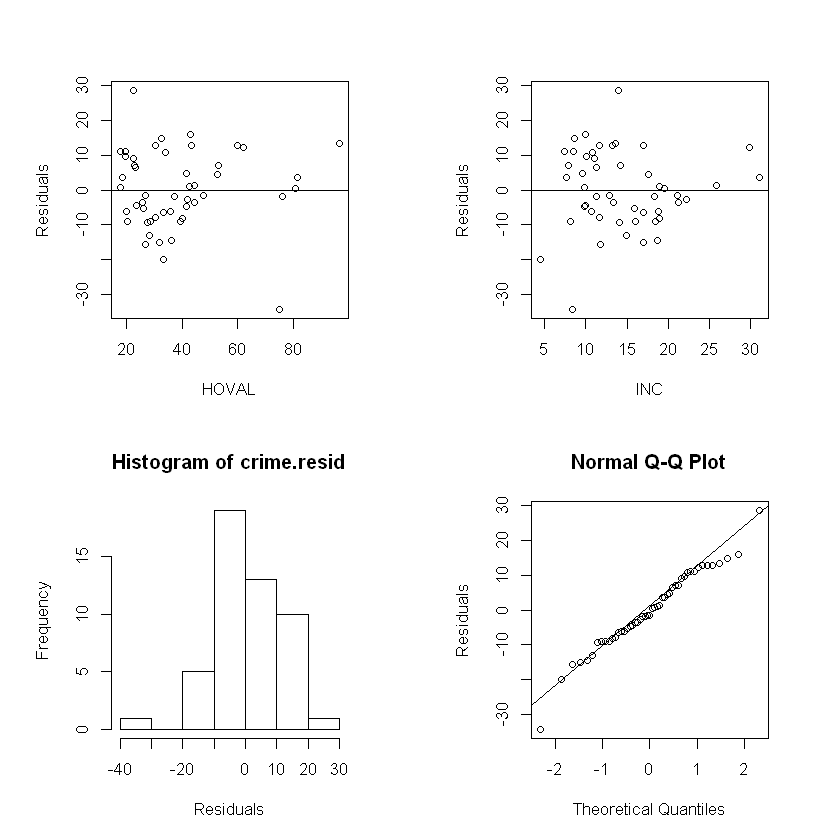

In [10]:
crime.resid = crime.lm$residuals # obtain residuals 

# plot 
par(mfrow=c(2,2), pty='s')

# residuals vs. independent variables 
plot(columbus.df$HOVAL, crime.resid, xlab='HOVAL', ylab='Residuals')
abline(h=0)
plot(columbus.df$INC, crime.resid, xlab='INC', ylab='Residuals')
abline(h=0)

# histogram and QQ plot
hist(crime.resid, xlab='Residuals')
qqnorm(crime.resid, ylab='Residuals')
qqline(crime.resid)

par(mfrow=c(1,1))

Histogram of residuals shows that residuals are negatively skewed from normality, and QQplot shows that there are several outliers. From “Residuals vs. HOVAL”, we can see that the variances of residuals varies a lot with different HOVAL values, thus the assumption of constant variance is systematically violated. From “Residuals vs. INC”, we can observe that the variance of residuals seem to be more constant for different INC values than that of “Residuals vs. HOVAL”.  To sum up, assumptions of linear regression are not fitted well. 

***

## Plotting
[`Back to Contents`](#Contents)

<a id='part1'></a>

### 2D Point Distributions
[`Back to Contents`](#Contents)

In [12]:
x = c(1.1,3.2,2.1,4.9,5.5,7.0,7.8,9.0,2.3,6.9) 
y = c(3, 3.5, 6, 1.5, 5.5, 3.2, 1, 4.5, 1, 7)

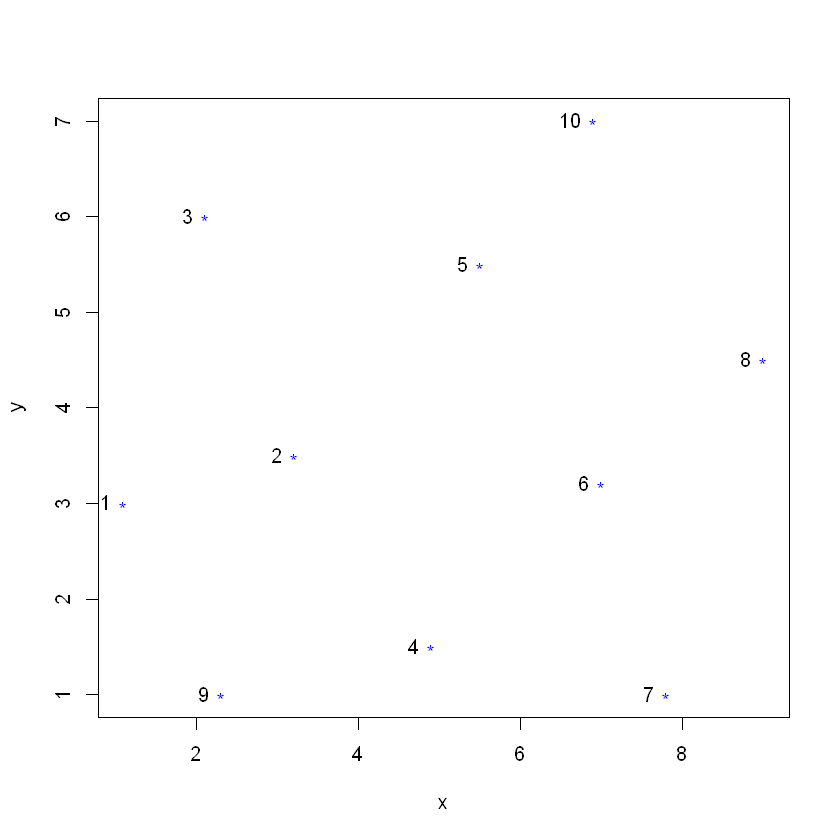

In [19]:
plot(x, y, col='blue', pch='*') # pch: plotting symbol
text(x, y, labels=1:n, pos=2)   # add labels for all samples 

# save plot 
# dev.copy(png, 'my_plot.png')
# dev.off()

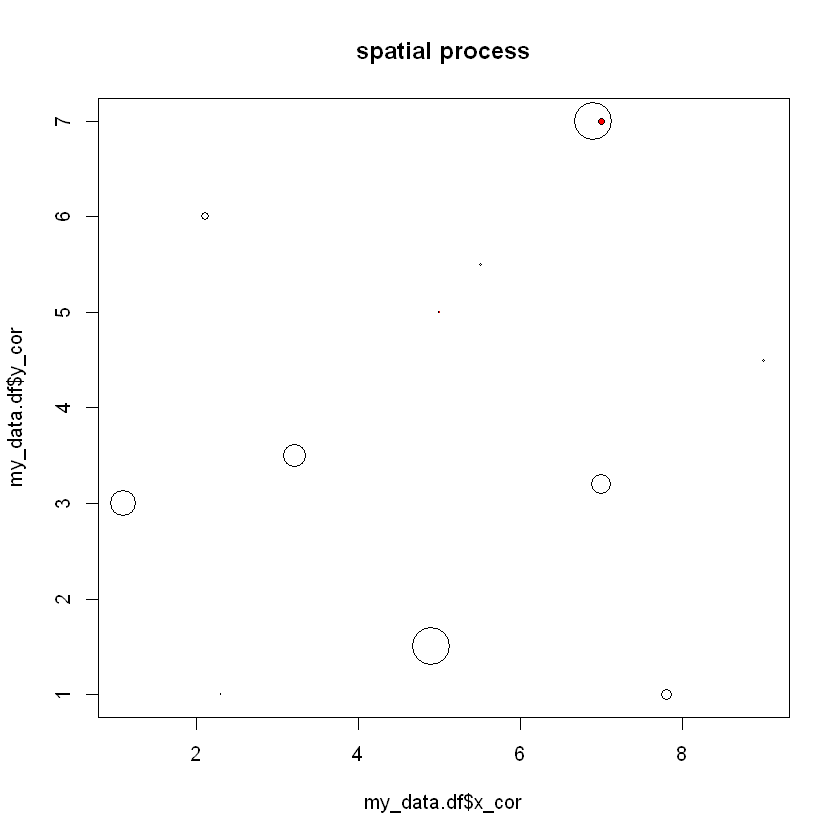

In [113]:
plot(my_data.df$x_cor, my_data.df$y_cor, type='n', main='spatial process')
symbols(my_data.df$x_cor, my_data.df$y_cor, 
        circles=(my_data.df$response-min(my_data.df$response))/50,
        inches=FALSE, add=TRUE)
symbols(pred.df$x_cor, pred.df$y_cor,
        circles=(pred.df$response-min(pred.df$response))/50,
        inches=0.03, bg='red', add=TRUE)